In [202]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
# importing data
matches = pd.read_csv('Cricket_Dataset/ICC Cricket World Cup/matches.csv').dropna(axis=1, how='all')
players = pd.read_csv('Cricket_Dataset/ICC Cricket World Cup/players.csv').dropna(axis=1, how='all')
teams = pd.read_csv('Cricket_Dataset/ICC Cricket World Cup/teams.csv').dropna(axis=1, how='all')
innings = pd.read_csv('Cricket_Dataset/ICC Cricket World Cup/innings.csv').dropna(axis=1, how='all')
venues = pd.read_csv('Cricket_Dataset/ICC Cricket World Cup/venues.csv').dropna(axis=1, how='all')
overBallDetails = pd.read_csv('Cricket_Dataset/ICC Cricket World Cup/overBallDetails.csv').dropna(axis=1, how='all')
overHistory = pd.read_csv('Cricket_Dataset/ICC Cricket World Cup/overHistory.csv').dropna(axis=1, how='all')

C:\Users\Hp\AppData\Local\Temp\ipykernel_1340\3845245241.py:8: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  overHistory = pd.read_csv('Cricket_Dataset/ICC Cricket World Cup/overHistory.csv').dropna(axis=1, how='all')


In [138]:
#defining function for data checking
def data(data):
    print("-----------column----------")
    print(data.columns)
    print("----------info-----------")
    print(data.info())
    print("----------shape-----------")
    print(data.shape)
    print("----------duplicate-----------") 
    print(data.duplicated().sum())
    print("----------column types-----------") 
    print(data.dtypes)
    print("----------missing values sum-----------") 
    print(data.isnull().sum())
    print("----------end-----------")  
    

## Initial Cleaning & Analyzing of Matches Data

In [139]:
data(matches)

-----------column----------
Index(['id', 'venueId', 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate', 'matchEndDate', 'matchDateMs', 'matchEndDateMs',
       'matchStatus_outcome', 'matchStatus_text',
       'matchStatus_victoryMarginRuns', 'matchStatus_victoryMarginWickets',
       'description', 'matchSummary', 'matchType', 'tournamentLabel',
       'oversLimit', 'totalBalls', 'isLimitedOvers', 'match.summary',
       'umpire.name.5'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                1700 non-null   int64  
 1   venueId                           1700 non-null   int64  
 2   toss.elected                      1600 non-null   object 
 3   toss.winner                       1600 non-null   object 
 4

In [140]:
matches.head()

,id,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchEndDate,matchDateMs,matchEndDateMs,...,matchStatus_victoryMarginWickets,description,matchSummary,matchType,tournamentLabel,oversLimit,totalBalls,isLimitedOvers,match.summary,umpire.name.5
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 1,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 2,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 3,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07T11:00:00+0000,1975-06-07T23:00:00+0000,1.713710e+11,1.714140e+11,...,NaN,Match 4,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11T11:00:00+0000,1975-06-11T23:00:00+0000,1.717160e+11,1.717600e+11,...,NaN,Match 5,NaN,ODI,Prudential World Cup 1975,60,NaN,True,NaN,NaN


In [141]:
matches.describe()

,id,venueId,team1Id,team2Id,matchDateMs,matchEndDateMs,matchStatus_victoryMarginRuns,matchStatus_victoryMarginWickets,oversLimit,totalBalls
count,1700.000000,1700.000000,1.700000e+03,1.700000e+03,1.675000e+03,1.358000e+03,146.000000,143.000000,1700.000000,317.0
mean,22892.415882,4913.961765,1.367768e+07,1.541787e+07,1.391383e+12,1.326907e+12,75.726027,5.391608,50.258235,300.0
std,35844.446203,21293.214389,1.369351e+08,1.453228e+08,3.210956e+11,3.242148e+11,62.647841,2.316612,2.187992,0.0
min,543.000000,1.000000,0.000000e+00,0.000000e+00,1.713710e+11,1.714140e+11,1.000000,1.000000,21.000000,300.0
25%,2970.750000,45.750000,1.569250e+03,1.569750e+03,1.374110e+12,1.300140e+12,26.000000,4.000000,50.000000,300.0
50%,4328.500000,84.000000,3.271000e+03,3.272000e+03,1.488090e+12,1.438240e+12,62.500000,5.000000,50.000000,300.0
75%,21565.250000,128.000000,8.300000e+03,8.301000e+03,1.583525e+12,1.532765e+12,111.000000,7.000000,50.000000,300.0
max,102980.000000,100236.000000,2.147212e+09,2.089043e+09,1.694520e+12,1.633200e+12,317.000000,10.000000,60.000000,300.0


The columns with most number of missing values have not been considered

In [142]:
df_matches = matches[['id','venueId' , 'toss.elected', 'toss.winner', 'team1Id', 'team2Id',
       'matchDate','matchStatus_outcome', 'matchStatus_text','description', 'matchSummary', 'matchType', 'tournamentLabel',
       'oversLimit']]

Ensuring consistency in naming conventions

In [143]:
df_matches.rename(columns={'id': 'matchId'}, inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_1340\3430291342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches.rename(columns={'id': 'matchId'}, inplace=True)


Datatype corrections

In [183]:
df_matches['matchDate'] = pd.to_datetime(df_matches['matchDate'], errors='coerce', utc=True)

# Extracting the year from the 'matchDate' column
df_matches['year'] = df_matches['matchDate'].dt.year

C:\Users\Hp\AppData\Local\Temp\ipykernel_1340\299043822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['matchDate'] = pd.to_datetime(df_matches['matchDate'], errors='coerce', utc=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_1340\299043822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['year'] = df_matches['matchDate'].dt.year


In [185]:
df_matches['matchStatus_outcome'].value_counts()

A    897
B    661
N    115
T     16
Name: matchStatus_outcome, dtype: int64

In [198]:
# Mapping the outcomes to the corresponding result
outcome_mapping = {'A': 'TeamA Won', 'B': 'TeamB Won', 'N': 'No Result', 'T': 'Tie'}
df_matches['result'] = df_matches['matchStatus_outcome'].map(outcome_mapping)

C:\Users\Hp\AppData\Local\Temp\ipykernel_1340\216690012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['result'] = df_matches['matchStatus_outcome'].map(outcome_mapping)


In [199]:
# Drop the 'matchStatus_outcome' column
df_matches.drop('matchStatus_outcome', axis=1, inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_1340\545119295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches.drop('matchStatus_outcome', axis=1, inplace=True)


In [186]:
df_matches['tournamentLabel'].value_counts()

ICC World Cup 2002/03                            54
ICC Men's Cricket World Cup League 2             54
ICC World Cup 2006/07                            51
ICC Cricket World Cup League 2                   49
ICC Cricket World Cup 2015                       49
                                                 ..
Ireland v England 2015                            1
South Africa v Ireland 2016                       1
Papua New Guinea in United Arab Emirates 2017     1
Australia v Ireland 2016                          1
Ireland v West Indies 2017                        1
Name: tournamentLabel, Length: 309, dtype: int64

In [187]:
df_matches['toss.winner'].value_counts()

Sri Lanka                   144
India                       141
Australia                   134
England                     127
New Zealand                 118
South Africa                112
Pakistan                    111
West Indies                 110
Zimbabwe                    107
Bangladesh                   82
Ireland                      70
Afghanistan                  55
United Arab Emirates         42
Scotland                     40
Netherlands                  33
Nepal                        32
Namibia                      27
Papua New Guinea             26
Oman                         22
Kenya                        13
Canada                       11
United States of America      9
United States                 6
Windies                       6
Jersey                        4
USA                           4
Hong Kong                     3
UAE                           3
South Africa                  2
East Africa                   2
Australia                     1
West Ind

In [217]:
# Create a mapping dictionary for inconsistent country names
country_mapping = {
    'United States': 'USA',
    'England ': 'England',
    'United States of America': 'USA',
    'United Arab Emirates' : 'UAE',
     'South Africa ' :  'South Africa' ,
    'Australia ' : 'Australia',
    'West Indies ' : 'West Indies'
}

# Replace inconsistent names with consistent names
df_matches['toss.winner'] = df_matches['toss.winner'].replace(country_mapping)

# Check the unique values after replacement
unique_countries = df_matches['toss.winner'].unique()
print("Unique Countries after Correction:", unique_countries)


Unique Countries after Correction: ['Australia' 'New Zealand' 'England' 'West Indies' 'Sri Lanka'
 'East Africa' 'Pakistan' 'India' 'Canada' nan 'Zimbabwe' 'South Africa'
 'UAE' 'Kenya' 'Netherlands' 'Scotland' 'Bangladesh' 'Namibia' 'Ireland'
 'Bermuda' 'Afghanistan' 'Papua New Guinea' 'Hong Kong' 'Nepal' 'Windies'
 'Oman' 'USA' 'Jersey']


C:\Users\Hp\AppData\Local\Temp\ipykernel_1340\2720644384.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_matches['toss.winner'] = df_matches['toss.winner'].replace(country_mapping)


In [188]:
df_matches['matchType'].value_counts()

ODI    1700
Name: matchType, dtype: int64

In [189]:
df_matches['matchStatus_text'].value_counts()

Match cancelled without a ball bowled                           30
Match abandoned without a ball bowled                           23
No Result                                                       22
India won by 6 wickets                                          20
No result                                                       16
                                                                ..
New Zealand won by 119 runs (New Zealand won the series 2-0)     1
New Zealand won by 98 runs                                       1
Australia won by 111 runs                                        1
India won by 76 runs                                             1
South Africa won by 111 runs                                     1
Name: matchStatus_text, Length: 1012, dtype: int64

In [209]:
data(df_matches)

-----------column----------
Index(['matchId', 'venueId', 'toss.elected', 'toss.winner', 'team1Id',
       'team2Id', 'matchDate', 'matchStatus_text', 'description',
       'matchSummary', 'matchType', 'tournamentLabel', 'oversLimit', 'year',
       'result'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   matchId           1700 non-null   int64              
 1   venueId           1700 non-null   int64              
 2   toss.elected      1600 non-null   object             
 3   toss.winner       1600 non-null   object             
 4   team1Id           1700 non-null   int64              
 5   team2Id           1700 non-null   int64              
 6   matchDate         1700 non-null   datetime64[ns, UTC]
 7   matchStatus_text  1692 non-null   object         

Distribution of Numeric Columns:

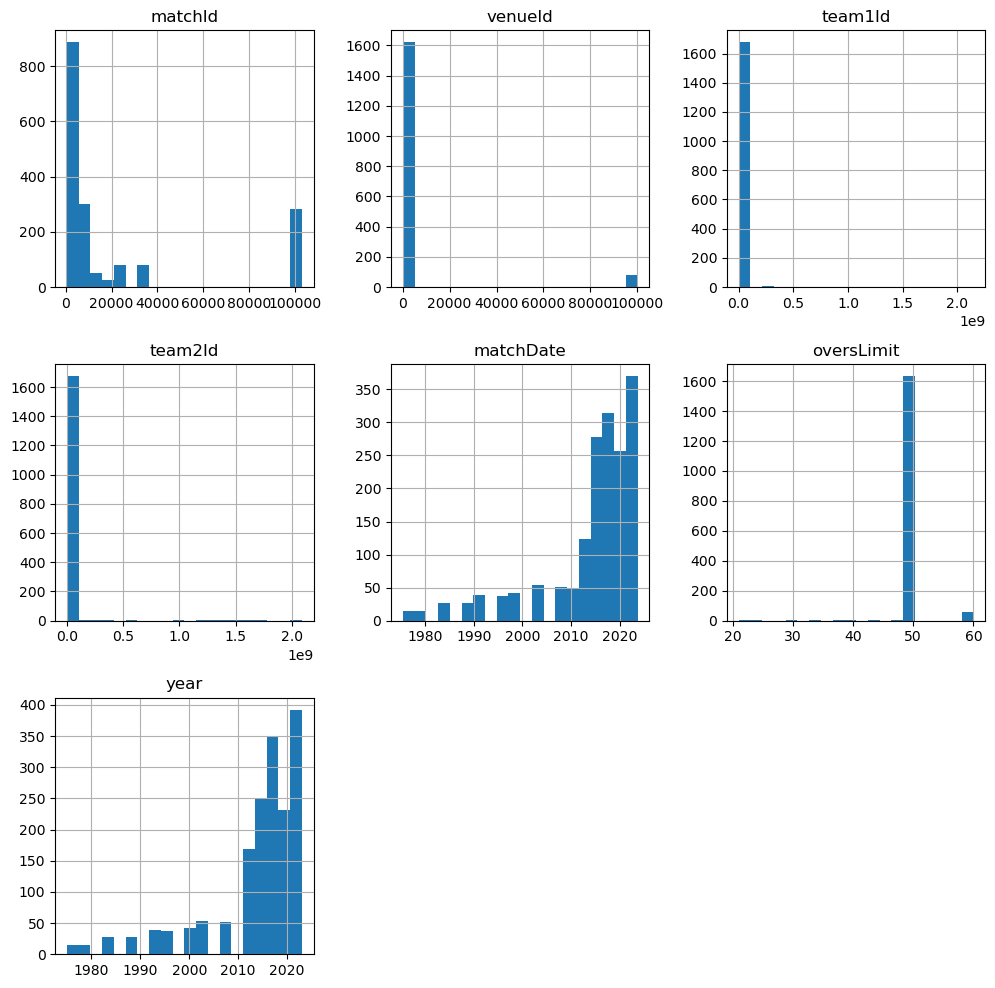

In [210]:
# Plot histograms for numeric columns
df_matches.hist(figsize=(12, 12), bins=20)
plt.show()

Match Results:

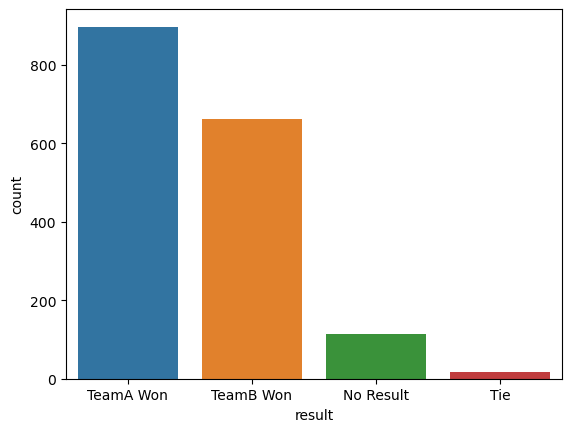

In [213]:

# Plot bar chart for 'result'
sns.countplot(x='result', data=df_matches)
plt.show()



Who won the Toss more:

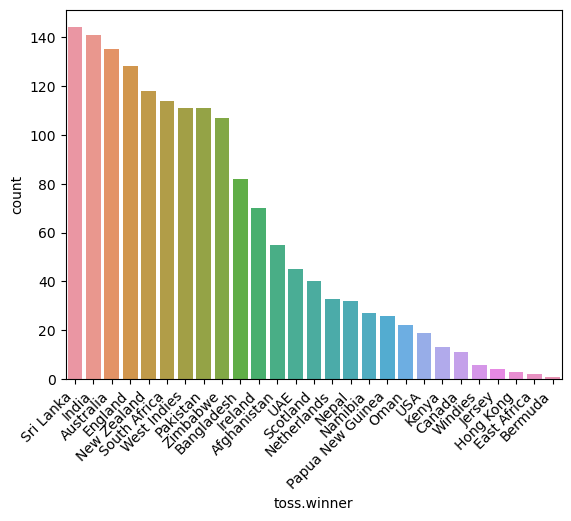

In [220]:
# Get the counts of each category
counts = df_matches['toss.winner'].value_counts()

# Order the categories based on counts in descending order
order = counts.index

# Create the count plot with the specified order
sns.countplot(x='toss.winner', data=df_matches, order=order)
plt.xticks(rotation=45, ha='right')
plt.show()

Distribution of Matches per year

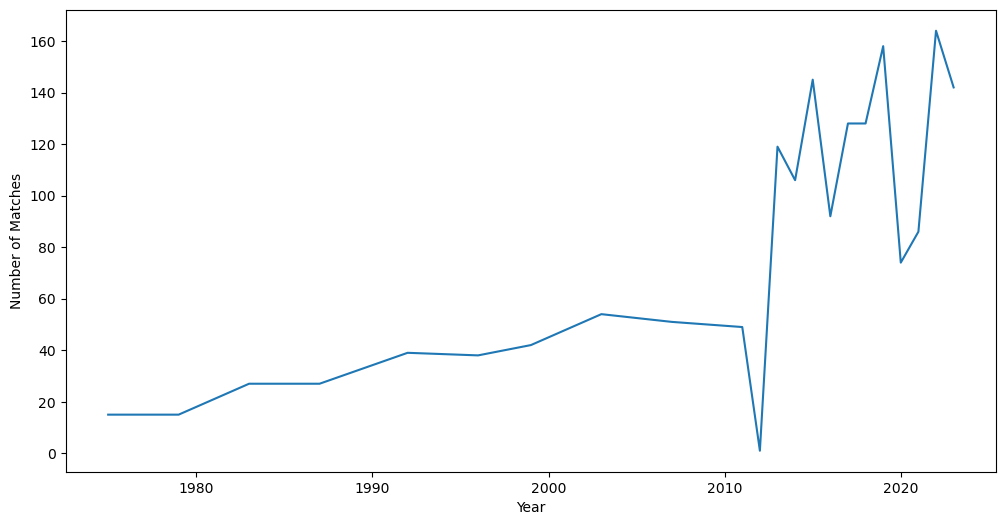

In [223]:
# Plot line chart for match count over time
#df_matches['matchDate'] = df_matches['matchDate'].dt.date
match_count_over_time = df_matches.groupby('year').size()
match_count_over_time.plot(kind='line', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.show()

## Initial Analyzing & Cleaning of Venues Data

In [148]:
data(venues)

-----------column----------
Index(['id', 'fullName', 'shortName', 'city', 'country'], dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         193 non-null    int64 
 1   fullName   193 non-null    object
 2   shortName  173 non-null    object
 3   city       185 non-null    object
 4   country    173 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.7+ KB
None
----------shape-----------
(193, 5)
----------duplicate-----------
0
----------column types-----------
id            int64
fullName     object
shortName    object
city         object
country      object
dtype: object
----------missing values sum-----------
id            0
fullName      0
shortName    20
city          8
country      20
dtype: int64
----------end-----------


In [149]:
venues.head()

,id,fullName,shortName,city,country
0,1,M. A. Chidambaram Stadium,Chidambaram,Chennai,India
1,2,Eden Gardens,Eden Gardens,Kolkata,India
2,3,Sawai Mansingh Stadium,Sawai Mansingh Stadium,Jaipur,India
3,4,Wankhede Stadium,Wankhede Stadium,Mumbai,India
4,5,M. Chinnaswamy Stadium,M. Chinnaswamy Stadium,Bengaluru,India


In [150]:
venues.describe()

,id
count,193.000000
mean,10038.813472
std,29833.754501
min,1.000000
25%,66.000000
50%,216.000000
75%,375.000000
max,100236.000000


In [151]:
df_venues = venues[['id', 'fullName', 'city', 'country']]

In [190]:
df_venues['country'].value_counts() 

India                42
England              19
Australia            16
New Zealand          16
South Africa         12
West Indies           8
Pakistan              8
Sri Lanka             7
Ireland               6
Bangladesh            5
Oman                  4
Namibia               4
Netherlands           4
Zimbabwe              4
UAE                   4
Scotland              3
Northern Ireland      2
Wales                 2
Malaysia              1
Kenya                 1
Papua New Guinea      1
USA                   1
Trinidad & Tobago     1
Nepal                 1
Qatar                 1
Name: country, dtype: int64

In [191]:
df_venues['city'].value_counts() 

Dublin         6
Hyderabad      4
Windhoek       4
Wellington     3
Pune           3
              ..
Cardiff        1
Bridgetown     1
North Sound    1
St George's    1
Sooriyawewa    1
Name: city, Length: 144, dtype: int64

Distribution of Countries:

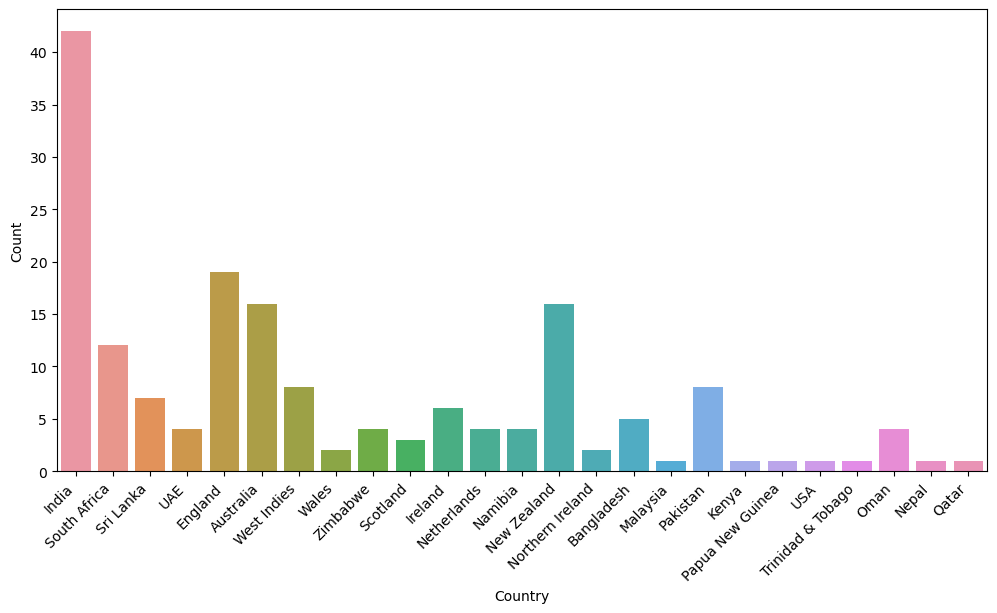

In [244]:
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=df_venues)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Venues per country

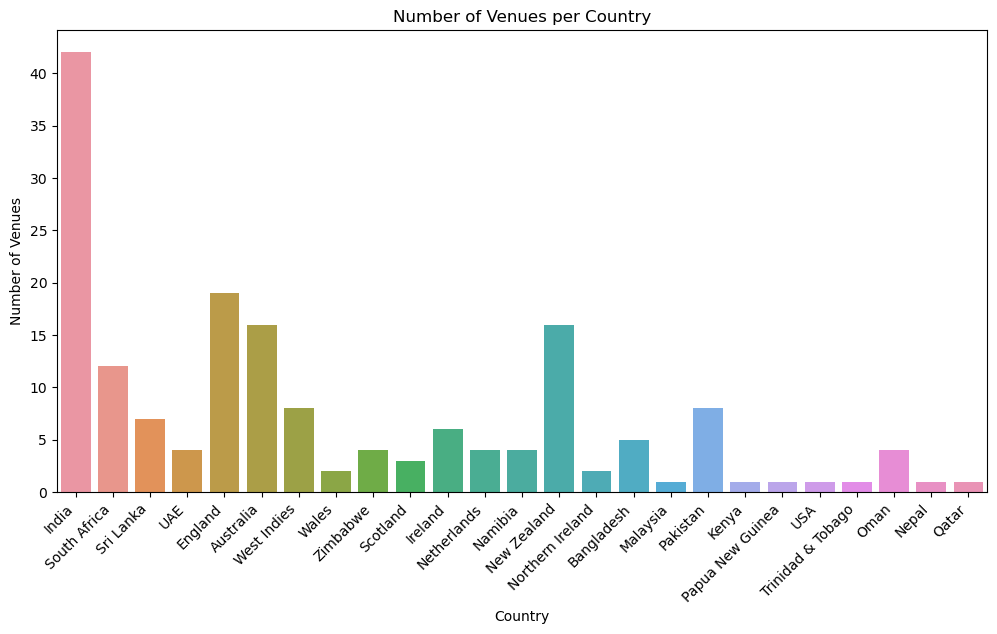

In [247]:
# Plotting the count of venues per country
plt.figure(figsize=(12, 6))
sns.countplot(x='country', data=df_venues)
plt.xlabel('Country')
plt.ylabel('Number of Venues')
plt.title('Number of Venues per Country')
plt.xticks(rotation=45, ha='right')
plt.show()

## Initial Cleaning & Analyzing of Players Data

In [152]:
data(players)

-----------column----------
Index(['id', 'fullName', 'shortName', 'nationality', 'dateOfBirth',
       'rightArmedBowl', 'rightHandedBat', 'bowlingStyle', 'teamId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28911 entries, 0 to 28910
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              28911 non-null  int64 
 1   fullName        28911 non-null  object
 2   shortName       28911 non-null  object
 3   nationality     28249 non-null  object
 4   dateOfBirth     28349 non-null  object
 5   rightArmedBowl  28911 non-null  bool  
 6   rightHandedBat  28911 non-null  bool  
 7   bowlingStyle    18328 non-null  object
 8   teamId          28911 non-null  int64 
dtypes: bool(2), int64(2), object(5)
memory usage: 1.6+ MB
None
----------shape-----------
(28911, 9)
----------duplicate-----------
0
----------column types-----------
id                 int64


In [153]:
players.head()

,id,fullName,shortName,nationality,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle,teamId
0,2065,Rick McCosker,RB McCosker,Australian,1946-12-11,False,True,NaN,2808
1,2114,Alan Turner,A Turner,Australian,1950-07-23,False,True,NaN,2808
2,2083,Greg Chappell,G Chappell,Australian,1948-08-07,True,True,MEDIUM_SEAM,2808
3,2115,Jeff Thomson,J Thomson,Australian,1950-08-16,True,True,FAST_SEAM,2808
4,2020,Ian Chappell,I Chappell,Australian,1943-09-26,True,True,LEG_SPIN,2808


In [154]:
players.describe()

,id,teamId
count,2.891100e+04,2.891100e+04
mean,1.174326e+04,1.728285e+07
std,8.996508e+04,1.528526e+08
min,1.000000e+00,1.100000e+01
25%,3.910000e+02,2.997000e+03
50%,1.075000e+03,3.882000e+03
75%,2.293000e+03,1.022350e+04
max,1.277627e+06,2.147212e+09


In [224]:
# converting dateofbirth in datetime
df_players = players
df_players['dateOfBirth'] = pd.to_datetime(df_players['dateOfBirth'])

#naming convention
df_players.rename(columns={'id': 'playerId'}, inplace=True)

In [192]:
df_players['nationality'].value_counts()

Indian           2851
Sri Lankan       2783
Australian       2593
Pakistani        2483
English          2478
South African    2309
New Zealander    2303
West Indian      2074
Zimbabwean       1933
Bangladeshi      1554
Irish            1073
Afghan            953
Scottish          424
Kenyan            365
Emirati           340
Dutch             304
Papuan            189
Namibian          157
Nepalese          112
Omani             109
American          108
Canadian          104
Hong Konger        99
Barbados           92
Trinidadian        81
Jamaican           66
Guyanan            63
Bermudian          31
Antiguan           25
Dominican          22
Zambian            21
Egyptian           20
Nevis              18
JE                 11
CA                 11
SCO                10
ENG                10
PG                  9
BD                  8
IN                  7
NP                  7
PK                  7
St Kitts            6
St Vincent          6
Ugandan             6
St Lucian 

Distribution of Players by Nationality (Top 25):

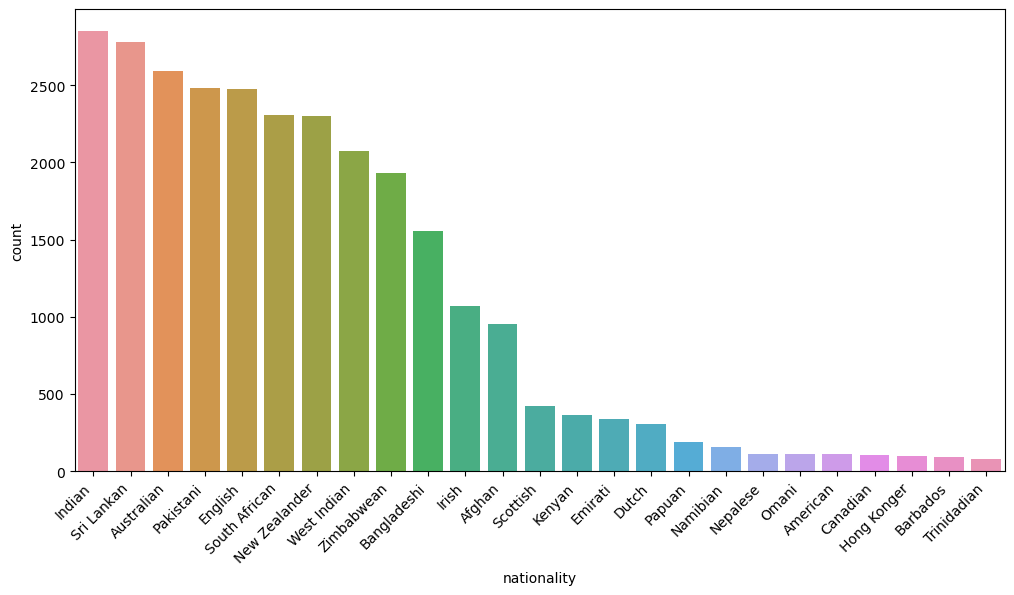

In [242]:
# Get the top 15 nationalities
top_nationalities = df_players['nationality'].value_counts().head(25).index

# Filter the dataframe for the top 15 nationalities
df_top_nationalities = df_players[df_players['nationality'].isin(top_nationalities)]

# Plot the countplot
plt.figure(figsize=(12, 6))
sns.countplot(x='nationality', data=df_top_nationalities, order=top_nationalities)
plt.xticks(rotation=45, ha='right')
plt.show()

Age Distribution of players:

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


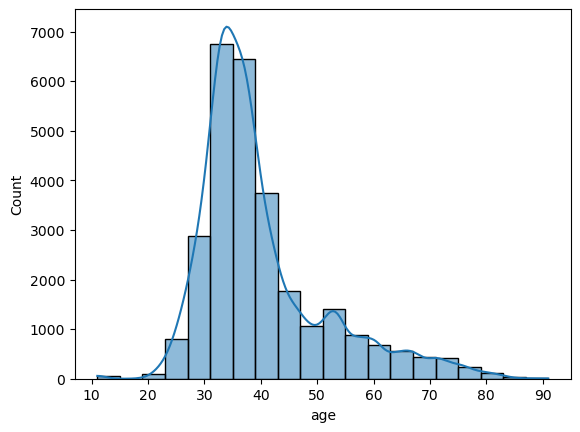

In [226]:
df_players['age'] = (pd.to_datetime('now') - df_players['dateOfBirth']).astype('<m8[Y]')
sns.histplot(df_players['age'], bins=20, kde=True)
plt.show()

How many bowlers and batsmen are there?

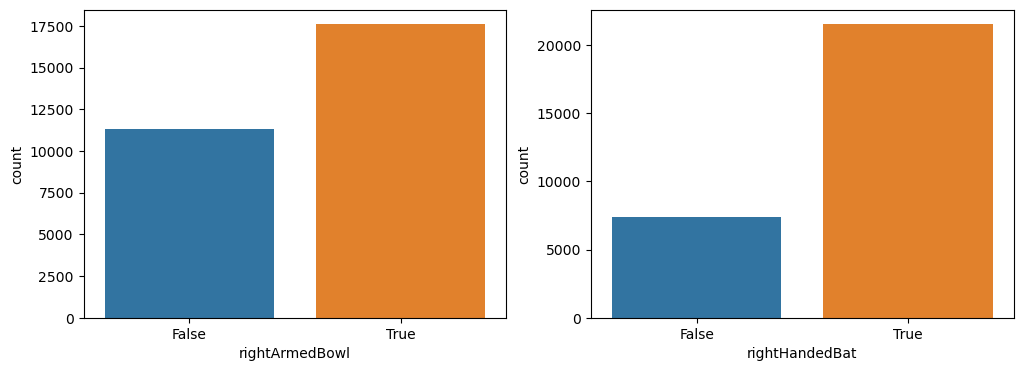

In [227]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x='rightArmedBowl', data=df_players, ax=axes[0])
sns.countplot(x='rightHandedBat', data=df_players, ax=axes[1])
plt.show()

## Initial Cleaning & Analyzing of Teams Data

In [156]:
data(teams)

-----------column----------
Index(['id', 'fullName', 'shortName', 'abbreviation', 'wicketKeeperId',
       'captainId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              354 non-null    int64  
 1   fullName        354 non-null    object 
 2   shortName       354 non-null    object 
 3   abbreviation    354 non-null    object 
 4   wicketKeeperId  347 non-null    float64
 5   captainId       348 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 16.7+ KB
None
----------shape-----------
(354, 6)
----------duplicate-----------
0
----------column types-----------
id                  int64
fullName           object
shortName          object
abbreviation       object
wicketKeeperId    float64
captainId         float64
dtype: object
----------missing values s

In [157]:
teams.head()

,id,fullName,shortName,abbreviation,wicketKeeperId,captainId
0,11,England,England,ENG,2050.0,1988.0
1,11,England,England,ENG,1996.0,2004.0
2,11,England,England,ENG,2229.0,2096.0
3,11,England,England,ENG,2222.0,2226.0
4,11,England,England,ENG,2330.0,2169.0


In [158]:
teams.describe()

,id,wicketKeeperId,captainId
count,354.000000,3.470000e+02,348.000000
mean,43.528249,2.935251e+04,13549.770115
std,79.050280,1.476460e+05,69371.336085
min,11.000000,1.000000e+00,1.000000
25%,14.000000,5.605000e+02,352.250000
50%,18.000000,1.670000e+03,1143.000000
75%,22.000000,2.483500e+03,2317.750000
max,572.000000,1.159641e+06,585083.000000


In [159]:
df_teams = teams[['id', 'fullName', 'abbreviation', 'wicketKeeperId', 'captainId']]
df_teams.rename(columns={'id': 'teamId'}, inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_1340\2080149546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_teams.rename(columns={'id': 'teamId'}, inplace=True)


In [195]:
df_teams['fullName'].value_counts()

Sri Lanka                   40
Australia                   29
Zimbabwe                    27
Pakistan                    25
New Zealand                 25
West Indies                 25
India                       24
South Africa                22
England                     20
Afghanistan                 15
Bangladesh                  15
Scotland                    11
United Arab Emirates        10
Ireland                     10
Netherlands                  8
Nepal                        8
Kenya                        7
Papua New Guinea             6
Namibia                      5
Canada                       5
United States of America     5
Oman                         4
Hong Kong                    4
East Africa                  2
Jersey                       1
Bermuda                      1
Name: fullName, dtype: int64

How many teams data is available?

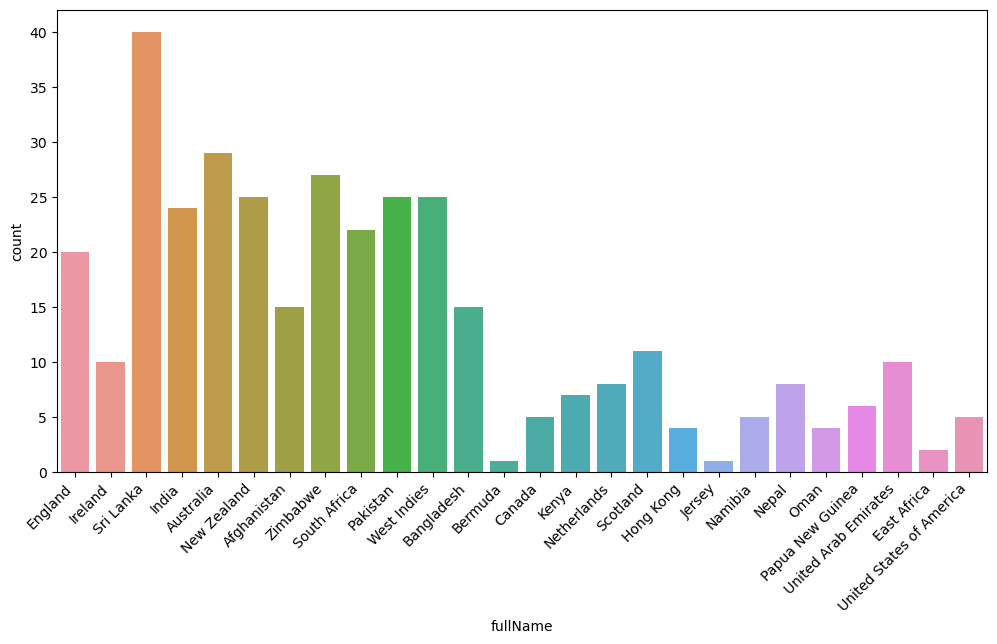

In [231]:
plt.figure(figsize=(12, 6))
sns.countplot(x='fullName', data=df_teams)
plt.xticks(rotation=45, ha='right')
plt.show()


## Initial Cleaning & Analyzing of Innings Data

In [160]:
data(innings)

-----------column----------
Index(['id', 'matchId', 'inningsNumber', 'runRate', 'overProgress', 'runs',
       'wkts', 'ballsFaced', 'fours', 'sixes', 'allOut', 'noBallRuns',
       'wideRuns', 'byeRuns', 'legByeRuns', 'penaltyRuns', 'battingTeamId',
       'bowlingTeamId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2682 non-null   int64  
 1   matchId        2682 non-null   int64  
 2   inningsNumber  2682 non-null   int64  
 3   runRate        2682 non-null   float64
 4   overProgress   2682 non-null   float64
 5   runs           2682 non-null   int64  
 6   wkts           2682 non-null   int64  
 7   ballsFaced     2682 non-null   int64  
 8   fours          2682 non-null   int64  
 9   sixes          2682 non-null   int64  
 10  allOut         2682 non-null   bool 

In [161]:
innings.head()

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId
0,1,3124,1,4.82,50.0,241,9,0,0,0,False,3,6,0,2,0,NaN,NaN
1,2,3124,2,3.95,47.2,187,10,0,0,0,True,0,2,0,2,0,NaN,NaN
2,3,3125,1,6.68,50.0,334,6,0,0,0,False,1,5,1,2,0,NaN,NaN
3,4,3125,2,3.26,40.1,131,9,0,0,0,True,1,6,0,9,0,NaN,NaN
4,5,3126,1,3.98,50.0,199,10,0,0,0,True,6,3,0,5,0,NaN,NaN


In [162]:
innings.describe()

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId
count,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000,2682.00000,601.000000,601.000000
mean,1341.500000,26651.462342,1.494407,5.275459,43.772110,231.857196,7.419090,58.701342,4.330723,0.953766,0.666294,7.340418,0.911633,3.388516,0.02610,84.231281,84.204659
std,774.371035,38412.373645,0.500062,1.174865,8.996007,70.897934,2.740889,112.282896,8.785216,2.434082,1.089493,4.462542,1.690977,2.794141,0.36037,121.630019,121.645084
min,1.000000,543.000000,1.000000,2.370000,0.400000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,11.000000,11.000000
25%,671.250000,3166.000000,1.000000,4.442500,41.000000,186.000000,6.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,0.00000,16.000000,16.000000
50%,1341.500000,6896.000000,1.000000,5.210000,48.200000,233.500000,8.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,3.000000,0.00000,22.000000,22.000000
75%,2011.750000,31750.000000,2.000000,6.000000,50.000000,282.000000,10.000000,0.000000,0.000000,0.000000,1.000000,10.000000,1.000000,5.000000,0.00000,125.000000,125.000000
max,2682.000000,102980.000000,2.000000,14.160000,50.000000,498.000000,11.000000,300.000000,48.000000,26.000000,13.000000,37.000000,13.000000,16.000000,5.00000,572.000000,572.000000


In [163]:
df_innings = innings

Boxplot to identify outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2cdafd7a5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2cdb241b400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cdbbcc8280>],
 'medians': [<matplotlib.lines.Line2D at 0x2cdbbb1a5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cdbbb1aac0>],
 'means': []}

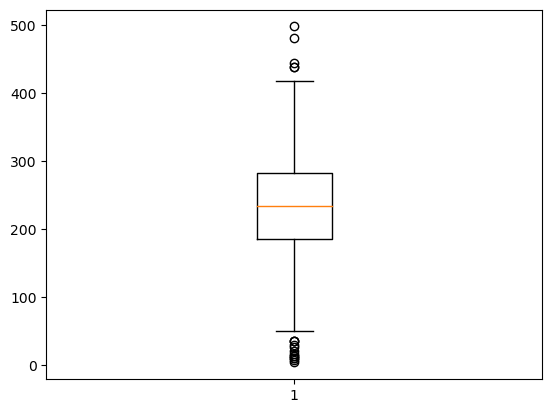

In [164]:
plt.boxplot(df_innings['runs'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2cdb3996430>,
 'caps': [<matplotlib.lines.Line2D at 0x2cdb39969d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2cdb3996160>],
 'medians': [<matplotlib.lines.Line2D at 0x2cdb3996f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x2cdb3988280>],
 'means': []}

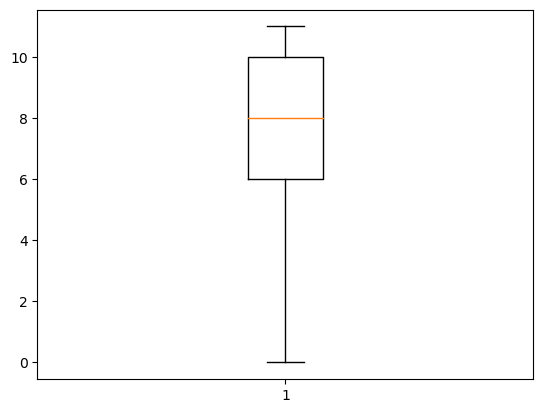

In [165]:
plt.boxplot(df_innings['wkts'])

Distribution of Numeric Columns:

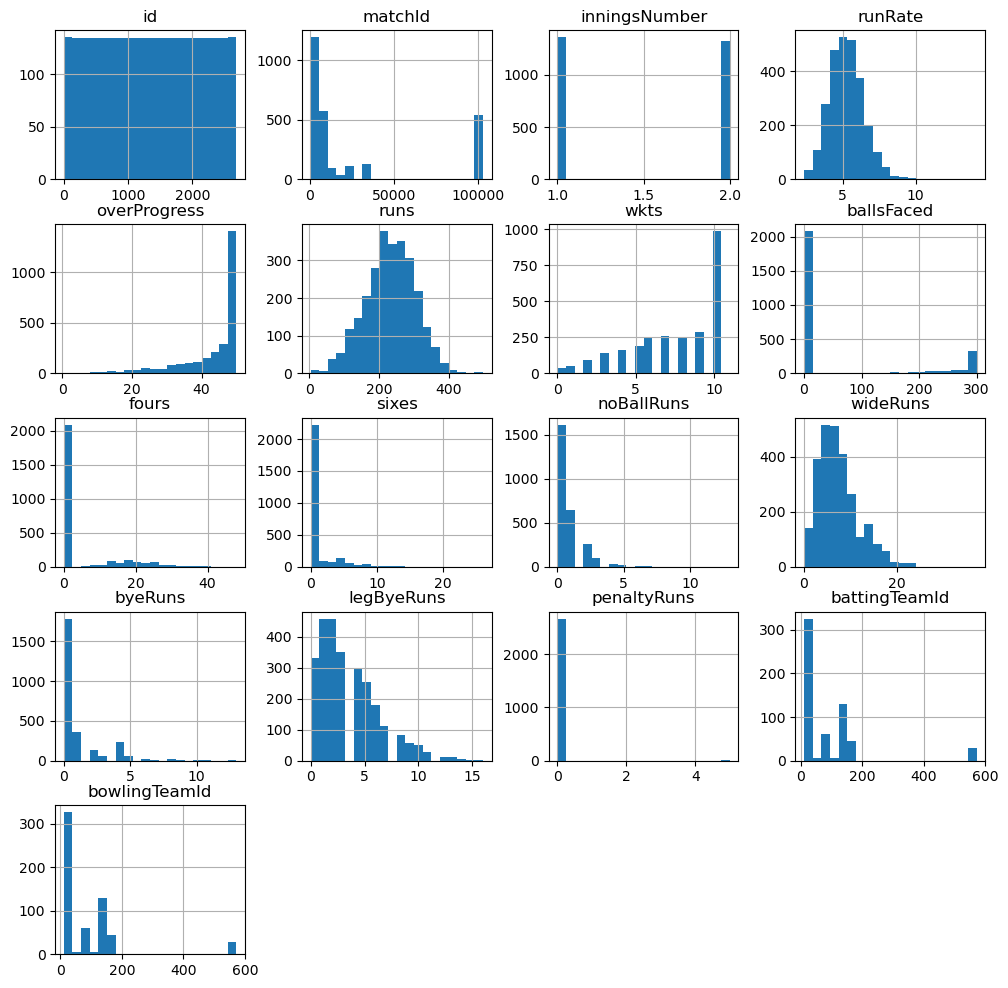

In [200]:
# Plot histograms for numeric columns
df_innings.hist(figsize=(12, 12), bins=20)
plt.show()

Distribution of Categorical Columns (e.g., 'allOut'):

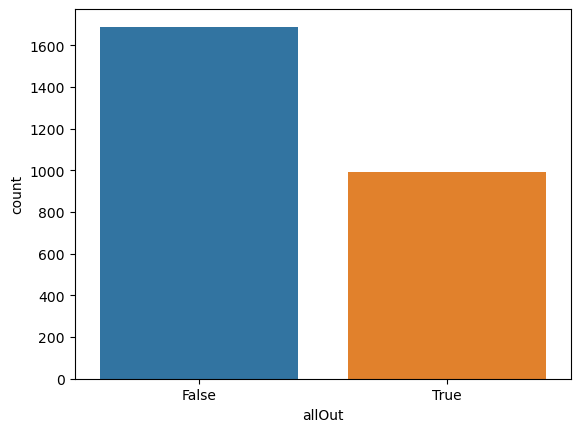

In [203]:
# Plot bar chart for 'allOut' column
sns.countplot(x='allOut', data=df_innings)
plt.show()

Correlation Heatmap:

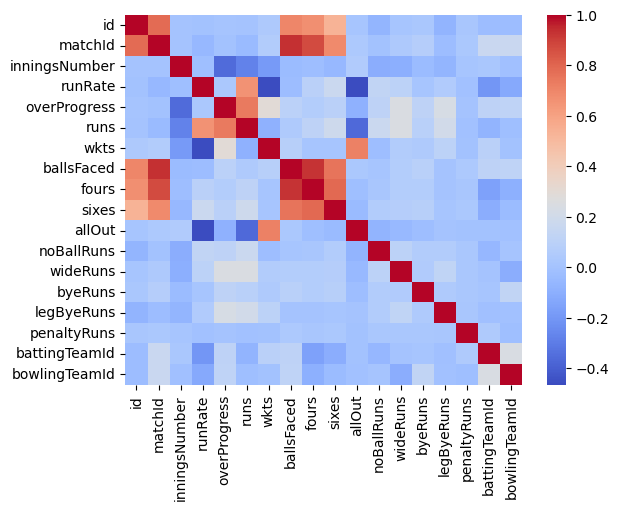

In [206]:
# Plot a correlation heatmap
correlation_matrix = df_innings.corr()
sns.heatmap(correlation_matrix,  cmap='coolwarm')
plt.show()

Relation between 'runRate' and 'overProgress':

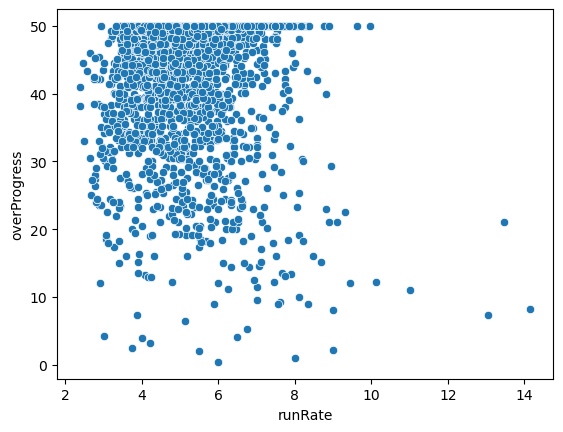

In [208]:
# Scatter plot for 'runRate' and 'overProgress'
sns.scatterplot(x='runRate', y='overProgress', data=df_innings)
plt.show()

## Initial Cleaning & Analyzing of Overs Data

In [166]:
data(overHistory)

-----------column----------
Index(['ovNo', 'ovBalls/0', 'ovBalls/1', 'ovBalls/2', 'ovBalls/3', 'ovBalls/4',
       'ovBalls/5', 'ovBalls/6', 'id', 'inningId', 'ovBalls/7', 'ovBalls/8',
       'ovBalls/9', 'ovBalls/10', 'ovBalls/11', 'ovBalls/12', 'ovBalls/13',
       'bowlerId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110411 entries, 0 to 110410
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ovNo        110411 non-null  int64  
 1   ovBalls/0   110411 non-null  object 
 2   ovBalls/1   110164 non-null  object 
 3   ovBalls/2   109906 non-null  object 
 4   ovBalls/3   109665 non-null  object 
 5   ovBalls/4   109405 non-null  object 
 6   ovBalls/5   108996 non-null  object 
 7   ovBalls/6   14563 non-null   object 
 8   id          110411 non-null  int64  
 9   inningId    110411 non-null  int64  
 10  ovBalls/7   1998 non-null    object 
 11  ovBalls/8

In [167]:
overHistory.head()

,ovNo,ovBalls/0,ovBalls/1,ovBalls/2,ovBalls/3,ovBalls/4,ovBalls/5,ovBalls/6,id,inningId,ovBalls/7,ovBalls/8,ovBalls/9,ovBalls/10,ovBalls/11,ovBalls/12,ovBalls/13,bowlerId
0,1,1,.,.,.,1Wd,.,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,.,.,.,1,1,NaN,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,W,1,.,1Nb,.,.,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,1Nb,.,.,.,4,.,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,.,.,4,.,.,.,NaN,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
overHistory.describe()

,ovNo,id,inningId,bowlerId
count,110411.000000,110411.000000,110411.000000,25729.000000
mean,23.455326,55206.000000,1316.441722,22568.645381
std,13.816605,31873.054623,784.593358,36452.766545
min,1.000000,1.000000,1.000000,8.000000
25%,12.000000,27603.500000,638.000000,1652.000000
50%,23.000000,55206.000000,1277.000000,3746.000000
75%,35.000000,82808.500000,2009.000000,19406.000000
max,50.000000,110411.000000,2682.000000,103869.000000


How the first and last over look like?

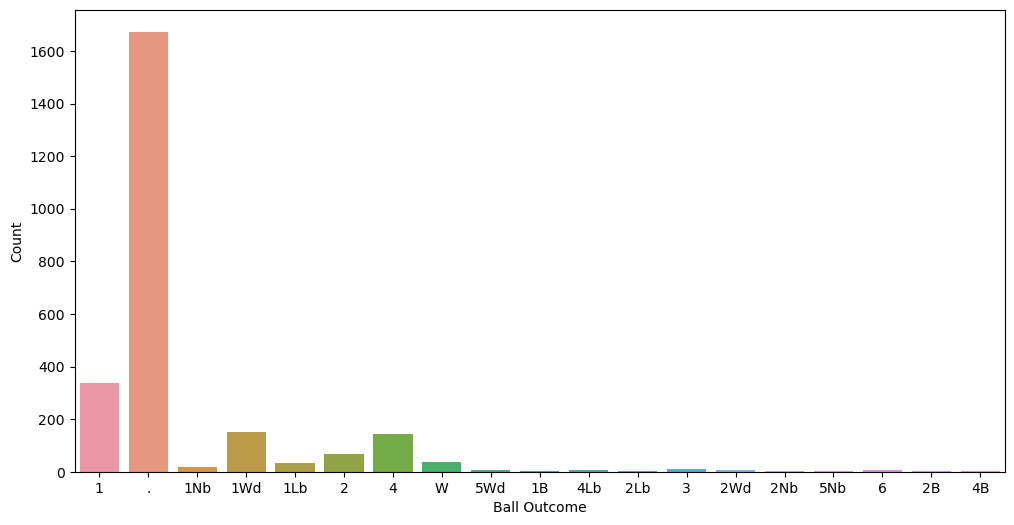

In [234]:
# Example for the first over (ovNo=1)
plt.figure(figsize=(12, 6))
sns.countplot(x='ovBalls/0', data=overHistory[overHistory['ovNo'] == 1])
plt.xlabel('Ball Outcome')
plt.ylabel('Count')
plt.show()


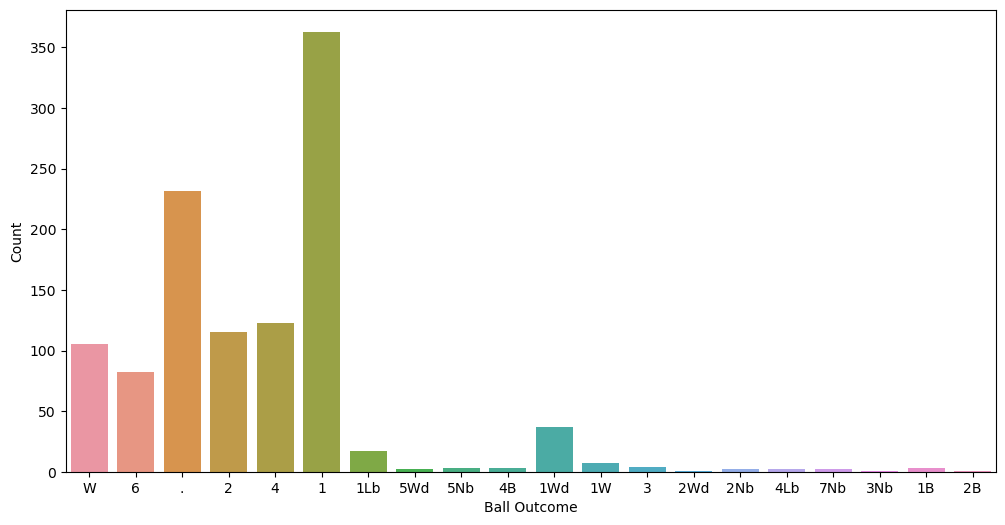

In [235]:
# Example for the last over (ovNo=50)
plt.figure(figsize=(12, 6))
sns.countplot(x='ovBalls/0', data=overHistory[overHistory['ovNo'] == 50])
plt.xlabel('Ball Outcome')
plt.ylabel('Count')
plt.show()


In [169]:
data(overBallDetails)

-----------column----------
Index(['id', 'countingBall', 'nonCountingBall', 'score', 'bowlerId',
       'facingBatsmanId', 'boundary', 'overHistoryId'],
      dtype='object')
----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157323 entries, 0 to 157322
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               157323 non-null  int64  
 1   countingBall     157323 non-null  int64  
 2   nonCountingBall  157323 non-null  int64  
 3   score            157323 non-null  object 
 4   bowlerId         157222 non-null  float64
 5   facingBatsmanId  157320 non-null  float64
 6   boundary         157323 non-null  bool   
 7   overHistoryId    157323 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 8.6+ MB
None
----------shape-----------
(157323, 8)
----------duplicate-----------
0
----------column types-----------
id                   int64
countingBa

In [170]:
overBallDetails.head()

,id,countingBall,nonCountingBall,score,bowlerId,facingBatsmanId,boundary,overHistoryId
0,1,1,1,1,5591.0,1220.0,False,84666
1,2,2,2,.,5591.0,1601.0,False,84666
2,3,3,3,.,5591.0,1601.0,False,84666
3,4,4,4,1Wd,5591.0,1601.0,False,84666
4,5,4,5,.,5591.0,1601.0,False,84666


In [171]:
overBallDetails.describe()

,id,countingBall,nonCountingBall,bowlerId,facingBatsmanId,overHistoryId
count,157323.000000,157323.000000,157323.000000,157222.000000,157320.000000,157323.000000
mean,78662.000000,3.491250,3.587651,22613.118635,21503.434389,97540.009452
std,45415.382537,1.708686,1.785653,36482.686712,36487.190850,7434.830042
min,1.000000,1.000000,1.000000,8.000000,8.000000,84666.000000
25%,39331.500000,2.000000,2.000000,1652.000000,1417.000000,91097.000000
50%,78662.000000,3.000000,4.000000,3746.000000,3006.000000,97546.000000
75%,117992.500000,5.000000,5.000000,19469.000000,18847.000000,103976.000000
max,157323.000000,7.000000,11.000000,103869.000000,104808.000000,110411.000000


In [172]:
df_matches.head()

,matchId,venueId,toss.elected,toss.winner,team1Id,team2Id,matchDate,matchStatus_outcome,matchStatus_text,description,matchSummary,matchType,tournamentLabel,oversLimit
0,2859,73,"Australia, who chose to bat",Australia,2808,2809,1975-06-07 11:00:00+00:00,A,Australia won by 73 runs,Match 1,NaN,ODI,Prudential World Cup 1975,60
1,2860,40,"New Zealand, who chose to bat",New Zealand,2810,2811,1975-06-07 11:00:00+00:00,B,New Zealand won by 181 runs,Match 2,NaN,ODI,Prudential World Cup 1975,60
2,2861,71,"England, who chose to bat",England,2812,2813,1975-06-07 11:00:00+00:00,A,England won by 202 runs,Match 3,NaN,ODI,Prudential World Cup 1975,60
3,2862,39,"West Indies, who chose to field",West Indies,2814,2815,1975-06-07 11:00:00+00:00,B,West Indies won by 9 wickets,Match 4,NaN,ODI,Prudential World Cup 1975,60
4,2863,82,"Sri Lanka, who chose to field",Sri Lanka,2816,2817,1975-06-11 11:00:00+00:00,A,Australia won by 52 runs,Match 5,NaN,ODI,Prudential World Cup 1975,60


In [173]:
df_players.head()

,playerId,fullName,shortName,nationality,dateOfBirth,rightArmedBowl,rightHandedBat,bowlingStyle,teamId
0,2065,Rick McCosker,RB McCosker,Australian,1946-12-11,False,True,NaN,2808
1,2114,Alan Turner,A Turner,Australian,1950-07-23,False,True,NaN,2808
2,2083,Greg Chappell,G Chappell,Australian,1948-08-07,True,True,MEDIUM_SEAM,2808
3,2115,Jeff Thomson,J Thomson,Australian,1950-08-16,True,True,FAST_SEAM,2808
4,2020,Ian Chappell,I Chappell,Australian,1943-09-26,True,True,LEG_SPIN,2808


In [174]:
df_teams.head()

,teamId,fullName,abbreviation,wicketKeeperId,captainId
0,11,England,ENG,2050.0,1988.0
1,11,England,ENG,1996.0,2004.0
2,11,England,ENG,2229.0,2096.0
3,11,England,ENG,2222.0,2226.0
4,11,England,ENG,2330.0,2169.0


In [175]:
df_innings.head()

,id,matchId,inningsNumber,runRate,overProgress,runs,wkts,ballsFaced,fours,sixes,allOut,noBallRuns,wideRuns,byeRuns,legByeRuns,penaltyRuns,battingTeamId,bowlingTeamId
0,1,3124,1,4.82,50.0,241,9,0,0,0,False,3,6,0,2,0,NaN,NaN
1,2,3124,2,3.95,47.2,187,10,0,0,0,True,0,2,0,2,0,NaN,NaN
2,3,3125,1,6.68,50.0,334,6,0,0,0,False,1,5,1,2,0,NaN,NaN
3,4,3125,2,3.26,40.1,131,9,0,0,0,True,1,6,0,9,0,NaN,NaN
4,5,3126,1,3.98,50.0,199,10,0,0,0,True,6,3,0,5,0,NaN,NaN


Distribution of Counting Balls:

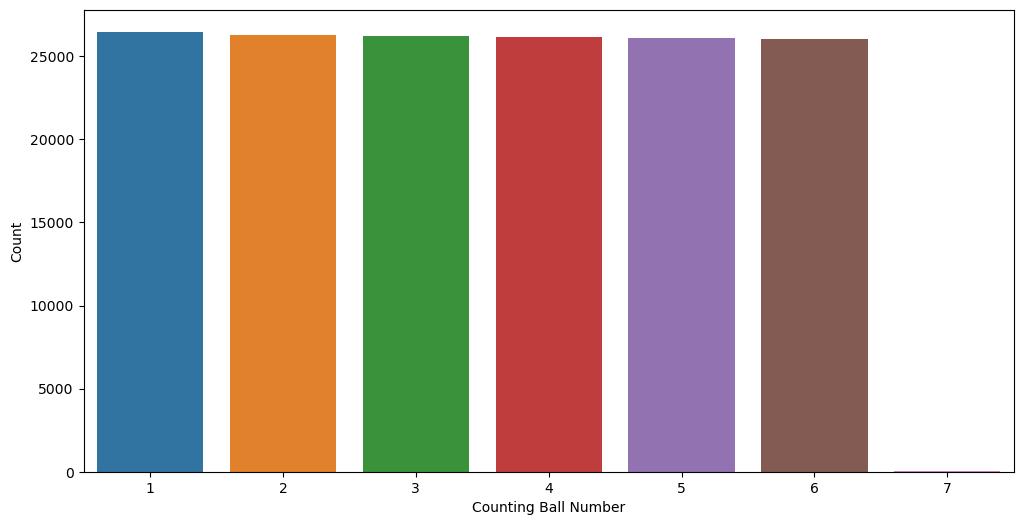

In [237]:
plt.figure(figsize=(12, 6))
sns.countplot(x='countingBall', data=overBallDetails)
plt.xlabel('Counting Ball Number')
plt.ylabel('Count')
plt.show()


In [243]:
Distribution of Non-Counting Balls:

SyntaxError: invalid syntax (1646617241.py, line 1)

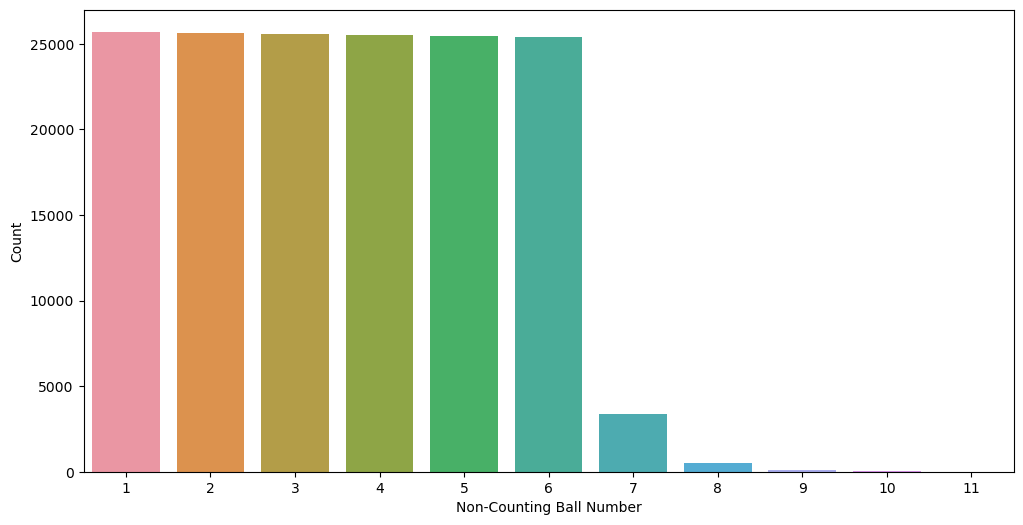

In [238]:
plt.figure(figsize=(12, 6))
sns.countplot(x='nonCountingBall', data=overBallDetails)
plt.xlabel('Non-Counting Ball Number')
plt.ylabel('Count')
plt.show()


Distribution of Scores:

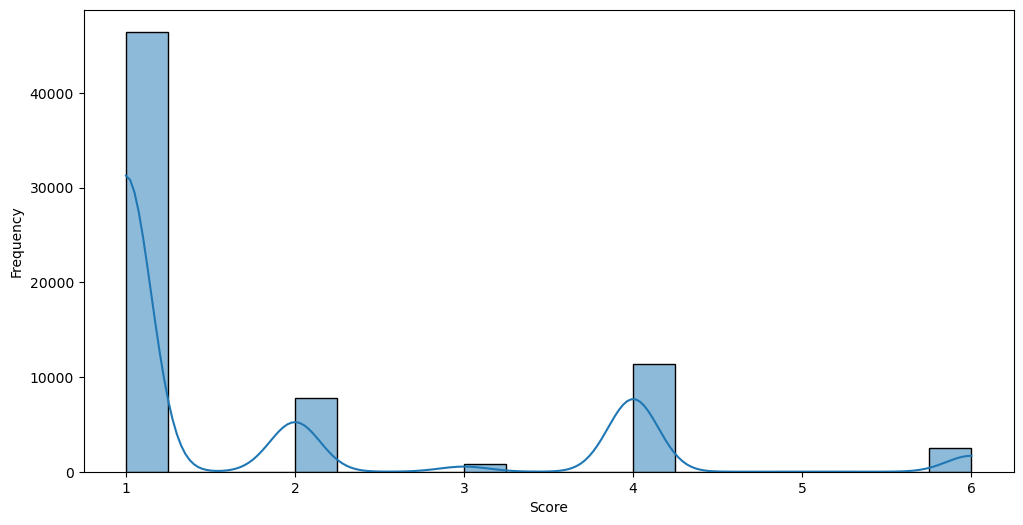

In [239]:
# Convert 'score' to a numeric type if needed
overBallDetails['score'] = pd.to_numeric(overBallDetails['score'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(overBallDetails['score'].dropna(), bins=20, kde=True)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


How many boundaries are there?

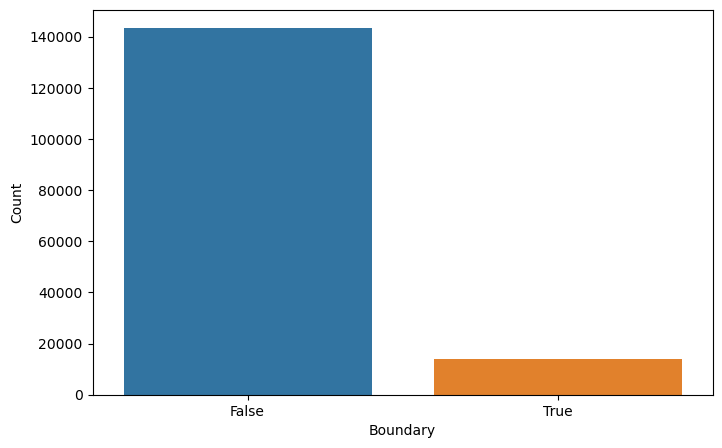

In [240]:
plt.figure(figsize=(8, 5))
sns.countplot(x='boundary', data=overBallDetails)
plt.xlabel('Boundary')
plt.ylabel('Count')
plt.show()


## In-depth Analysis by Merging Tables

Team Performance Analysis:

In [248]:
# Merge df_matches with df_innings on matchId
merged_team_performance = pd.merge(df_matches, df_innings, on='matchId')

# Calculate metrics like run rate, average score, and wicket count for each team
team_metrics = merged_team_performance.groupby(['battingTeamId', 'matchId']).agg({
    'runs': 'sum',
    'wkts': 'sum',
    'ballsFaced': 'sum'
}).reset_index()

# Calculate run rate
team_metrics['runRate'] = team_metrics['runs'] / (team_metrics['ballsFaced'] / 6)

# Explore team_metrics dataframe
print(team_metrics.head())


   battingTeamId  matchId  runs  wkts  ballsFaced   runRate
0           11.0    33689   110    10         152  4.342105
1           11.0    33690   246    10         294  5.020408
2           11.0    33691   259    10         275  5.650909
3           11.0    33693   271    10         282  5.765957
4           11.0    33694   201    10         169  7.136095


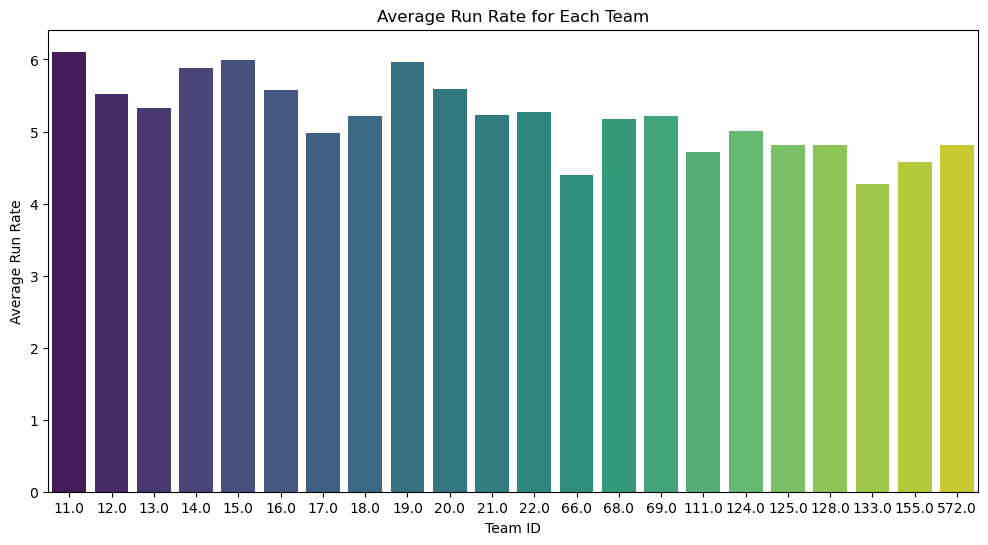

In [258]:
# Calculate average run rate for each team
average_run_rate = team_metrics.groupby('battingTeamId')['runRate'].mean().reset_index()

# Plotting the average run rate for each team
plt.figure(figsize=(12, 6))
sns.barplot(x='battingTeamId', y='runRate', data=average_run_rate, palette='viridis')
plt.title('Average Run Rate for Each Team')
plt.xlabel('Team ID')
plt.ylabel('Average Run Rate')
plt.show()

Player Performance Analysis:

In [251]:
# Merge df_players with df_overBallDetails on bowlerId
merged_player_performance = pd.merge(df_players, overBallDetails, left_on='playerId', right_on='bowlerId')

# Calculate batting and bowling averages, strike rates, and other player statistics
player_statistics = merged_player_performance.groupby('fullName').agg({
    'score': 'mean',
    'boundary': 'sum',
    'countingBall': 'mean',
    'nonCountingBall': 'mean'
}).reset_index()

# Explore player_statistics dataframe
print(player_statistics.head())


       fullName     score  boundary  countingBall  nonCountingBall
0  Aamir Kaleem  2.636364         8      3.500000         3.500000
1  Aarif Sheikh  1.553191       352      3.511858         3.561265
2   Aaron Jones  1.808511       216      3.508021         3.577540
3  Aasif Sheikh       NaN         0      2.000000         2.000000
4    Adam Milne  1.970370      1330      3.475862         3.606897


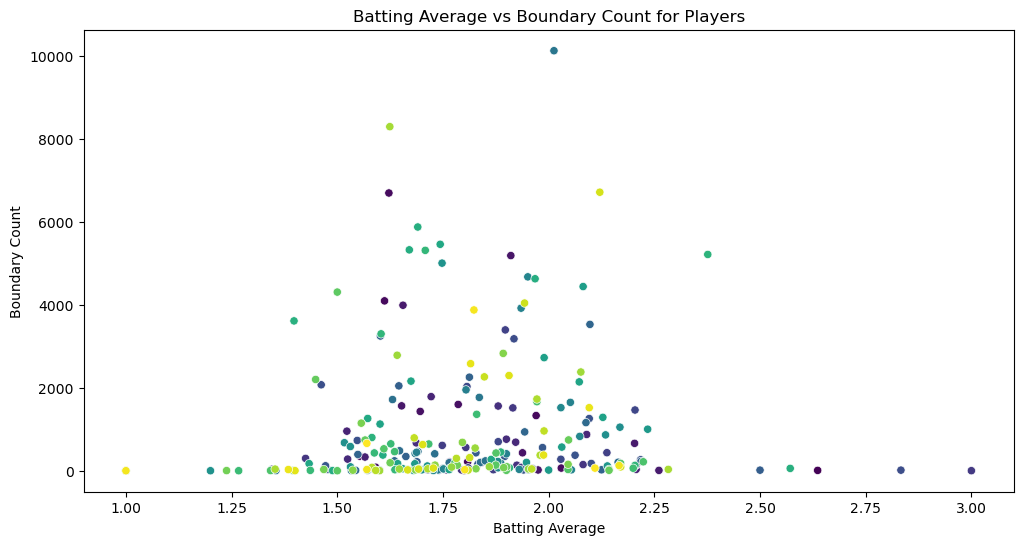

In [259]:
# Plotting the relationship between batting average and boundary count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='score', y='boundary', data=player_statistics, hue='fullName', palette='viridis', legend=False)
plt.title('Batting Average vs Boundary Count for Players')
plt.xlabel('Batting Average')
plt.ylabel('Boundary Count')
plt.show()

Most of the tables can't be merged because the IDs don't match, especially for the teams table, as the team ID is referenced in many tables. More interesting analyses can be done with that.
